# Regresion lineal

- **Objetivo de la actividad**: el alumno aplicara una regresión lineal simple para la predicción de información
- En esta práctica se analizarán los datos de los salarios determinados por el años de experiencia de una persona, se realizará para predecir los salarios de los empleados de acuerdo a sus años de experiencia laboral.

## Parte 1 : importacion de bibliotecas y datos
---

### Paso 1: Importacion de las bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Paso 2: Importacion de datos 

In [2]:
path_data = "Salarios_Data.csv"
data_salary = pd.read_csv(path_data)
data_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# Cambio de nombre de las columnas
data_salary = data_salary.rename(columns={"YearsExperience": "AñosExperiencia", "Salary":"Salario"})

data_salary.head()

,AñosExperiencia,Salario
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Parte 2 : Graficar los datos
---

### Paso 1: Determinar la correlación

In [4]:
# Determinar la correlacion de pearson
data_salary.corr(method='pearson')

,AñosExperiencia,Salario
AñosExperiencia,1.000000,0.978242
Salario,0.978242,1.000000


### Paso 2: Crear un gráfico

In [5]:
y = data_salary["Salario"] # dependiente
x = data_salary.AñosExperiencia # independiente

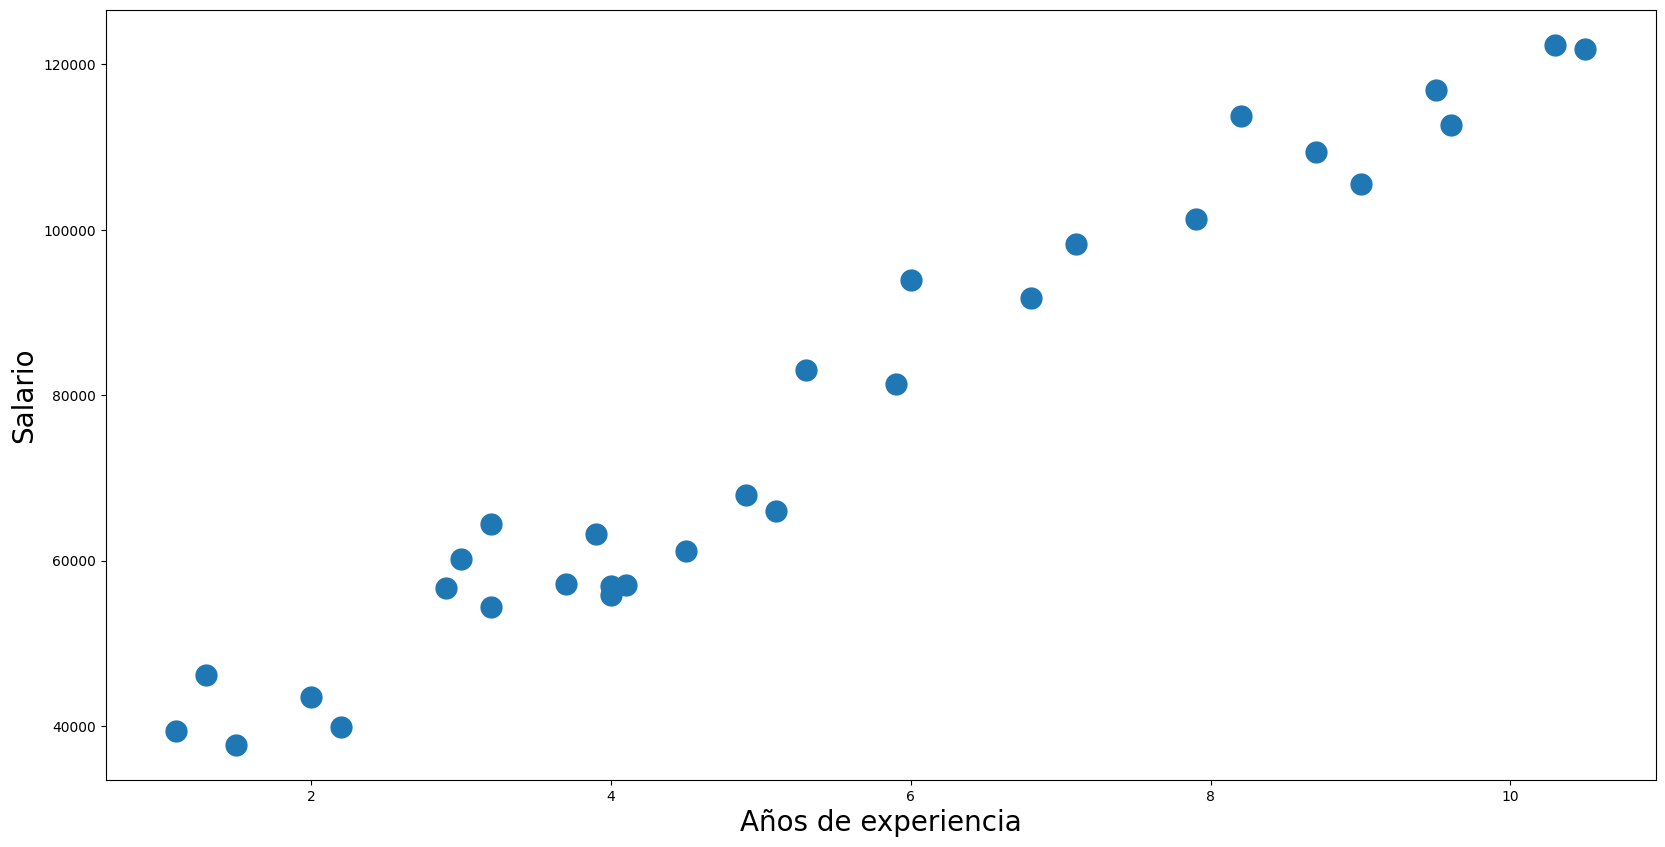

In [6]:
# Incrementar el tamaño del grafico
plt.figure(figsize=(20,10))

plt.plot(x, y, "o", markersize = 15)

# Agrega y aumenta el tamño de los textos en de los ejes x, y
plt.ylabel("Salario", fontsize = 20)
plt.xlabel("Años de experiencia", fontsize = 20)

# Aumenta el tamaño de la letra de los valores x, y
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

# Muestra el grafico
plt.show()

## Parte 3: Realizar un regresión lineal simple
---

### Paso 1: Calcular la pendiente `x` la intersección `y`, de la linea de regresión lineal

In [7]:
m, b = np.polyfit(x,y,1)
print (f"La pendiente de la linea es {m}")
print (f"La y-interseccion es {b}")
print (f"La mejor linea de regresion lineal es: {m}x y {b}y")

La pendiente de la linea es 9449.96232145508
La y-interseccion es 25792.2001986687
La mejor linea de regresion lineal es: 9449.96232145508x y 25792.2001986687y


### Calcular el centroide
- Se calcula utilizando la función promedio

In [8]:
# coordenada y para el centroide
y_mean = y.mean()

# Coordenada x para el centroide
x_mean = x.mean()

print(f"El centroide es x={y_mean}, y={x_mean}")

El centroide es x=76003.0, y=5.3133333333333335


### Paso 3: Superponer la linea de regresión y el punto del centroide en el gráfico

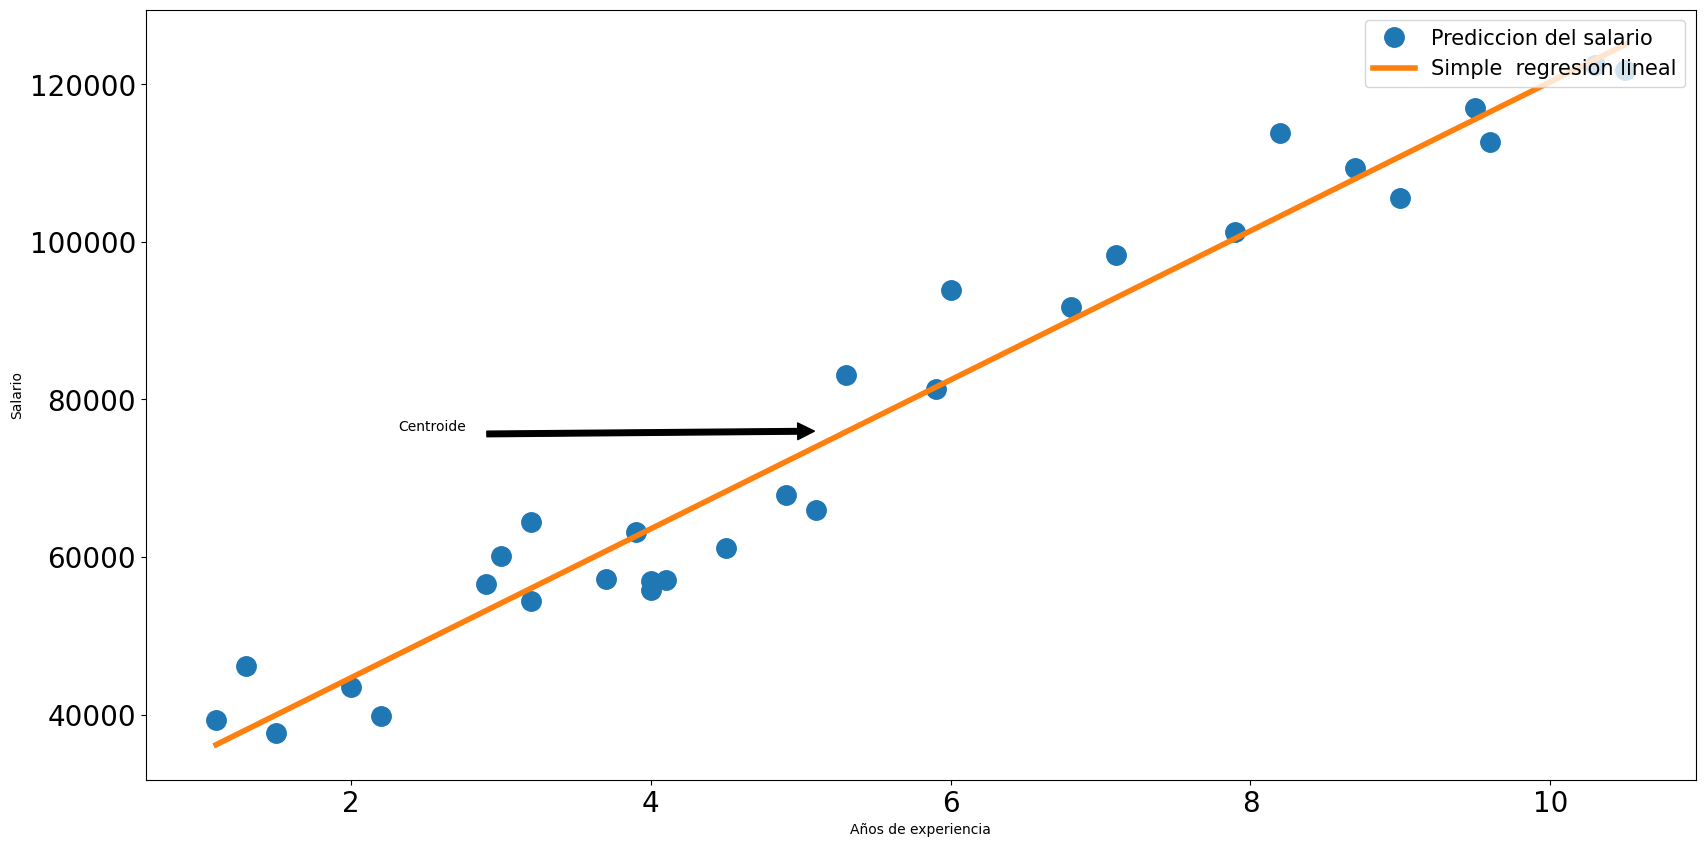

In [9]:
# Determinar tamñao del grafico
plt.figure(figsize=(20, 10))

# Dibujar el diagrama de dispersion del conjunto de datos
plt.plot(x, y, "o", markersize = 14, label = "Prediccion del salario")

# Punto del centroide en el grafico
plt.plot(x, m*x + b, "-", label = "Simple  regresion lineal", linewidth = 4)

# Crear titulos del eje x, y
plt.ylabel("Salario")
plt.xlabel("Años de experiencia")

# Aumenta el tamaño de la letra de los valores x, y
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

# Señalar el putno del centroide en la grafica
plt.annotate("Centroide", xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor="black", shrink=0.05))

# Crear leyenda
plt.legend(loc = "upper right", fontsize = 15)

# Mostrar el grafico
plt.show()

### Paso 4: Predicción

In [10]:
# Prediccion de salarios de acuerdo a los años de experiencia

def prediction(query):
    if query < 1:
        print("Debes insertar una edad mayor a 1")
        return
    predict = m * query + b
    return predict

In [11]:
# Se predice que con 10.3 años de experiencia se recibirá un salario de 123126.8
prediction(10.3)

123126.81210965602

In [12]:
pd.DataFrame({"Años experiencia": x, "Salario": y, "y-predecida": m*x+b})

,Años experiencia,Salario,y-predecida
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
